(inversion_transformadas)=
# Inversión de transformadas. De vuelta al tiempo real

Continuando con el ejemplo se estudiará la salida del sistema para una entrada de tipo escalón unidad:

$$\bar{H} (s) = \left[ \frac{R}{R A s + 1} \right]  \overline{Q_1} (s) = \left[ \frac{R}{R A s + 1} \right]  \frac{1}{s}$$

Mediante el operador transformada inversa de Laplace ($\mathcal{L}^{- 1}$) se obtiene la salida en tiempo real. Para ello hay que descomponer la función a invertir en partes asimilables a las que se encuentran en las tablas de transformadas de Laplace (apartado {ref}`tablas_transformadas`):

$$\bar{H} (s) = \left[ \frac{R}{R A s + 1} \right]  \frac{1}{s} = \frac{a}{s} + \frac{b}{s + \frac{1}{A R}}$$

Donde $a$ y $b$ son dos variables a determinar. Obviamente, $a = R$ y $b = - R$. Por tanto,

$$H (t) = \left[ R - R \mathrm{e}^{- \frac{t}{R A}} \right] U (t) = R U (t)
   \left[ 1 - \mathrm{e}^{- \frac{t}{R A}} \right] = R U (t)  \left[ 1 - \mathrm{e}^{-
   \frac{t}{\tau}} \right]$$
   
donde $\tau = R A$ es la constante de tiempo y tiene dimensiones de tiempo.

Tamibén se puede realizar la transformada inversa de Laplace de una manera muy simple utilizando *Sympy*:

In [2]:
using SymPy, Plots, LaTeXStrings

# Definición de los símbolos necesarios
R, A, t = symbols("R A t", real=True)
s = symbols("s")

# Definición de la función de transferencia, G(s)
G = R/(R*A*s+1)

# Definición de la función de entrada, f(s), 
# en este caso un escalón unidad
f = 1/s

# Cálculo de la respuesta, H(t)
sympy.inverse_laplace_transform(G*f, s, t)

            -t      
            ───     
            A⋅R     
R⋅θ(t) - R⋅ℯ   ⋅θ(t)

Cuanto mayor es $\tau$ más lenta es la respuesta, más tarda el sistema en alcanzar el estado estacionario. Se comprueba
que cuanto menor es la sección del tanque más rápida es la respuesta. Si
$\tau$ es grande se dice que el sistema presenta una gran inercia.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Influencia en la respuesta de la constante de tiempo.
```

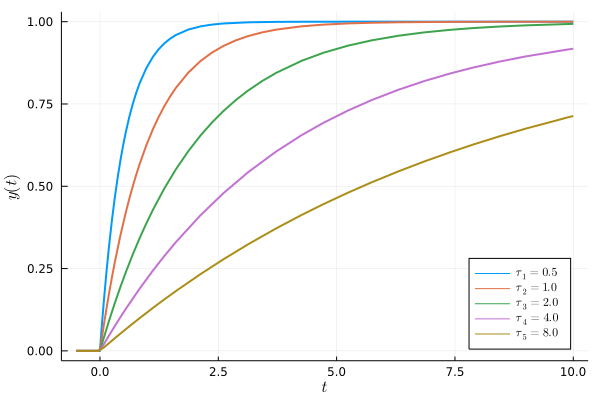

In [3]:
Taus = [1//2, 1, 2, 4, 8 ]
f = 1/s
Yt = []
fig_inv = plot(lw=2,
    xlabel=L"t", ylabel=L"y(t)", legend=:bottomright)

for τ in Taus
    G = 1/(τ*s+1)
    y = G*f
    yt = sympy.inverse_laplace_transform(y, s, t)
    push!(Yt, yt)
end

for i in 1:5
    tau = float(Taus[i])
    plot!(Yt[i], -0.5, 10, lw=2, label=L"\tau_%$i = %$tau")
end

display(fig_inv)

```{admonition} Ejemplo
La técnica propuesta en este capítulo para obtener modelos matemáticos se puede utilizar para modelos de mayor complejidad, como el que se obtiene en la resolución del {ref}`prob307`.
```